In [1]:
import numpy as np
import pandas as pd
import mlxtend
from mlxtend.frequent_patterns import apriori, association_rules
import numpy as np
import matplotlib.pyplot as plt


In [3]:
import csv

# NOTE: Should we be using LiquorSalesSample.csv or just LiquorSales.csv
data = pd.read_csv("LiquorSalesSamplev2.csv")
data.head(10)
# data.info()

,Reference,Invoice/Item Number,Invoice,Item Number,Date,Store Number,City,Zip Code,County,Category Name,Label,Item Description,Pack,Bottle Volume (ml),Bottles Sold,Sale (Dollars),Volume Sold (Liters)
0,167646,3.06831E+11,306831300,20,7/30/12,3869,CORALVILLE,52241,Johnson,VODKA 80 PROOF,Vodka,Burnett's Vodka 80 Prf,12,750,1,6.82,0.75
1,262366,3.06831E+11,306831300,15,7/30/12,3869,CORALVILLE,52241,Johnson,VODKA FLAVORED,Vodka,Uv Cake Vodka,12,750,1,9.74,0.75
2,794258,3.06831E+11,306831300,9,7/30/12,3869,CORALVILLE,52241,Johnson,VODKA FLAVORED,Vodka,Firefly Sweet Tea Vodka,12,750,1,14.00,0.75
3,19508,4295S05259700026,4295S0525,26,4/26/12,4295,DES MOINES,50317,Polk,CANADIAN WHISKIES,Whiskey,Crown Royal Canadian Whisky,24,375,4,44.16,1.50
4,64511,4295S05259700008,4295S0525,8,4/26/12,4295,DES MOINES,50317,Polk,100 PROOF VODKA,Vodka,Mccormick Vodka,12,750,12,59.52,9.00
5,65917,4295S05259700032,4295S0525,32,4/26/12,4295,DES MOINES,50317,Polk,CANADIAN WHISKIES,Whiskey,Canadian Club Whisky,12,750,2,23.62,1.50
6,262277,4295S05259700004,4295S0525,4,4/26/12,4295,DES MOINES,50317,Polk,AMERICAN DRY GINS,Gin,Seagrams Extra Dry Gin,48,100,48,70.08,4.80
7,262740,4295S05259700001,4295S0525,1,4/26/12,4295,DES MOINES,50317,Polk,DECANTERS & SPECIALTY PACKAGES,Novelty,Jagermeister Cocktail Glass Set,12,375,12,112.20,4.50
8,339096,4295S05259700050,4295S0525,50,4/26/12,4295,DES MOINES,50317,Polk,VODKA 80 PROOF,Vodka,New Amsterdam Vodka,12,750,2,20.70,1.50
9,433545,4295S05259700039,4295S0525,39,4/26/12,4295,DES MOINES,50317,Polk,IMPORTED VODKA,Vodka,Absolut Swedish Vodka 80 Prf,24,375,3,26.40,1.12


In [4]:
data[['Month', 'Day', 'Year']] = data['Date'].str.split('/', expand = True)
data

,Reference,Invoice/Item Number,Invoice,Item Number,Date,Store Number,City,Zip Code,County,Category Name,Label,Item Description,Pack,Bottle Volume (ml),Bottles Sold,Sale (Dollars),Volume Sold (Liters),Month,Day,Year
0,167646,3.06831E+11,306831300,20,7/30/12,3869,CORALVILLE,52241,Johnson,VODKA 80 PROOF,Vodka,Burnett's Vodka 80 Prf,12,750,1,6.82,0.75,7,30,12
1,262366,3.06831E+11,306831300,15,7/30/12,3869,CORALVILLE,52241,Johnson,VODKA FLAVORED,Vodka,Uv Cake Vodka,12,750,1,9.74,0.75,7,30,12
2,794258,3.06831E+11,306831300,9,7/30/12,3869,CORALVILLE,52241,Johnson,VODKA FLAVORED,Vodka,Firefly Sweet Tea Vodka,12,750,1,14.00,0.75,7,30,12
3,19508,4295S05259700026,4295S0525,26,4/26/12,4295,DES MOINES,50317,Polk,CANADIAN WHISKIES,Whiskey,Crown Royal Canadian Whisky,24,375,4,44.16,1.50,4,26,12
4,64511,4295S05259700008,4295S0525,8,4/26/12,4295,DES MOINES,50317,Polk,100 PROOF VODKA,Vodka,Mccormick Vodka,12,750,12,59.52,9.00,4,26,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004375,937731,S29361400016,S29361400,16,11/30/15,3806,WEST DES MOINES,50266,Polk,IMPORTED VODKA,Vodka,Stolichnaya Russian Vodka 80 Prf,12,750,12,215.88,9.00,11,30,15
1004376,39010,S444400048,S44440004,48,1/7/15,3573,OTTUMWA,52501,Wapello,CANADIAN WHISKIES,Whiskey,Canadian Mist Whisky,12,1000,3,30.21,3.00,1,7,15
1004377,512891,S444400040,S44440004,40,1/7/15,3573,OTTUMWA,52501,Wapello,IMPORTED DRY GINS,Gin,Bombay Sapphire Gin,12,1000,3,79.26,3.00,1,7,15
1004378,77593,S444400054,S44440005,54,1/7/15,3573,OTTUMWA,52501,Wapello,PEPPERMINT SCHNAPPS,Schnapps,Paramount Peppermint Schnapps,24,375,3,10.26,1.12,1,7,15


In [5]:
data['Month'].unique()

array(['7', '4', '1', '2', '3', '5', '6', '8', '10', '9', '11', '12'],
      dtype=object)

In [6]:


# PREVIOUSLY tried version 
# def timeofyear_maximum(filename, Time, Sales):
#     data = pd.read_csv(filename)
#     data[['Month', 'Day', 'Year']] = data['Date'].str.split('/', expand = True)
#     data = data.groupby(data[Time])
#     max_of_col = data[Sales].max()
#     return max_of_col
# def timeofyear_maximum(filename, Time, Sales):
#     data = pd.read_csv(filename)
#     data[['Month', 'Day', 'Year']] = data['Date'].str.split('/', expand = True)
#     data = data.groupby(data[Time])
    
#     max_of_col = data[Sales].max().sort_values(['Month'], ascending=True)
#     return max_of_col

# Q1: What time of year are liquor sales the highest? - Most popular months oct-jan

#  New sorted version 
def timeofyear_maximum(filename, Time, Sales): 
    data = pd.read_csv(filename) 
    data[['Month', 'Day', 'Year']] = data['Date'].str.split('/', expand=True) 
    data['Month'] = pd.to_numeric(data['Month']) 
    data = data.sort_values(by='Month') 
    data = data.groupby(Time) 
    max_of_col = data[Sales].max() 
    return max_of_col 


print(timeofyear_maximum('LiquorSalesSamplev2.csv', 'Month', 'Sale (Dollars)'))
print(timeofyear_maximum('LiquorSalesSamplev2.csv', 'Year', 'Sale (Dollars)'))

Month
1     40470.0
2     31980.0
3     33488.4
4     31344.0
5     29686.8
6     28782.0
7     22680.0
8     31867.2
9     32610.0
10    53676.0
11    48929.4
12    41940.0
Name: Sale (Dollars), dtype: float64
Year
12    48929.4
13    33488.4
14    53676.0
15    26820.0
Name: Sale (Dollars), dtype: float64


In [ ]:
# Are there hotspots where liquor sales are higher than average? mention highest and lowest

def county_maximum(filename, County, Sales):
    data = pd.read_csv(filename)
    data[['Month', 'Day', 'Year']] = data['Date'].str.split('/', expand = True)
    data = data.groupby(data[County])
    max_of_col = data[Sales].max() 
    return max_of_col

def county_mean(filename, County, Sales):
    data = pd.read_csv(filename)
    data[['Month', 'Day', 'Year']] = data['Date'].str.split('/', expand = True)
    data = data.groupby(data[County])
    mean_of_col = data[Sales].mean() 
    return mean_of_col.sort_values()
    # max_avg, min_avg = mean_of_col.max(), mean_of_col.min()
    # return max_avg, min_avg

def state_mean(filename, Sales):
    data = pd.read_csv(filename)
    mean_of_col = data[Sales].mean() 
    return mean_of_col


# print(county_maximum('LiquorSales.csv', 'County', 'Sale (Dollars)'))
# print(county_maximum('LiquorSales.csv', 'City', 'Sale (Dollars)'))
print("County mean: ", county_mean('LiquorSalesSamplev2.csv', 'County', 'Sale (Dollars)'))
print("City mean: ", county_mean('LiquorSalesSamplev2.csv', 'City', 'Sale (Dollars)'))
print("State mean: ", state_mean('LiquorSalesSamplev2.csv', 'Sale (Dollars)'))

## Reminder: Taylor county has lowest average liqour sales overall, Dallas county has highest average liquor sales overall.
## Reminder: West Branch city has lowest average liqour sales overall, Le Claire city has highest average liquor sales overall.


In [8]:
## Is there a preferred liquor type by county or city

def preferred_type(filename, Liquor):
    data = pd.read_csv(filename)
    data = data.groupby(data[Liquor])['Reference'].count()
    return data.sort_values()


def preferred_type_byLoc(filename, Liquor, Location):
    data = pd.read_csv(filename)
    data = data.groupby([Location, Liquor])['Reference'].count()
    return data

    
print(preferred_type('LiquorSalesSamplev2.csv', 'Label'))
print(preferred_type_byLoc('LiquorSalesSamplev2.csv', 'Label', 'County'))
print(preferred_type_byLoc('LiquorSalesSamplev2.csv', 'Label', 'City'))

Label
High Proof Beer             2
Novelty                  3928
Scotch                   8698
Other Grain Alcohol      9035
Cream Based Liqueur     23980
Pre-Mixed Cocktails     29766
Gin                     40627
Tequila                 43743
Brandy                  53845
Bourbon                 56701
Schnapps                59490
Liqueur                101368
Rum                    125322
Whiskey                192711
Vodka                  255164
Name: Reference, dtype: int64
52529
26266


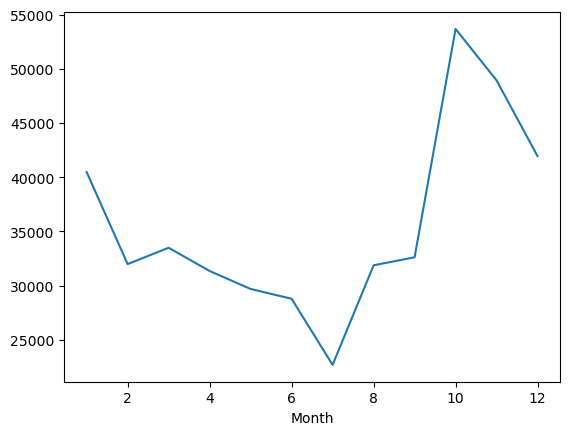

In [7]:
## Time of year when liquor sales go up

monthly_sales = timeofyear_maximum('LiquorSalesSamplev2.csv', 'Month', 'Sale (Dollars)')

monthly_sales.plot();